## Exploratory Data Analysis for Data Scientists in the UK

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Analysing the initial dataframe :

In [3]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


### Filter for UK Data Scientist Roles:

In [15]:
df_DA_UK = df[(df['job_country'] == 'United Kingdom') & (df['job_title_short'] == 'Data Scientist')]

df_DA_UK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
152,Data Scientist,Data Science Team Lead,Anywhere,via OnlyDataJobs,Full-time,True,United Kingdom,2023-12-23 13:12:16,False,False,United Kingdom,None,NaN,NaN,StepStone Group,"[react, docker]","{'libraries': ['react'], 'other': ['docker']}"
280,Data Scientist,Data Scientist - Autonomy Dependability,"Porton Down, Salisbury, UK",via WJHL Jobs,Full-time,False,United Kingdom,2023-07-20 13:15:45,False,False,United Kingdom,None,NaN,NaN,DEFENCE SCIENCE AND TECHNOLOGY LABORATORY,None,None
400,Data Scientist,Data Scientist - Business Analytics - Chase,"London, UK",via KSNT Jobs,Full-time,False,United Kingdom,2023-08-21 13:15:46,False,False,United Kingdom,None,NaN,NaN,Jobleads-UK,"[sql, python]","{'programming': ['sql', 'python']}"
491,Data Scientist,Data Scientist,United Kingdom,via LinkedIn,Full-time,False,United Kingdom,2023-10-19 13:36:47,False,False,United Kingdom,None,NaN,NaN,MRJ Recruitment,"[sql, python]","{'programming': ['sql', 'python']}"
636,Data Scientist,Data Scientist - Pricing analyst,United Kingdom,via Careermap,Full-time,False,United Kingdom,2023-01-24 13:17:10,False,False,United Kingdom,None,NaN,NaN,Careermap,"[python, r, sql]","{'programming': ['python', 'r', 'sql']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784351,Data Scientist,MSc in Geo-Energy with Machine Learning and Da...,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:29,False,False,United Kingdom,None,NaN,NaN,Earthworks,None,None
784635,Data Scientist,Data Scientist,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:17,False,False,United Kingdom,None,NaN,NaN,Humanity,"[python, java, scala]","{'programming': ['python', 'java', 'scala']}"
784804,Data Scientist,Lead Data Scientist,"London, UK",via LinkedIn,Full-time,False,United Kingdom,2023-07-22 06:16:02,False,False,United Kingdom,None,NaN,NaN,Harnham,[python],{'programming': ['python']}
784963,Data Scientist,"Product Data Scientist, Bitcoin Wallet","London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:23,False,False,United Kingdom,None,NaN,NaN,Verse,"[python, r, sql, go, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'prog..."


Upon examining the job_location coloumn of the filtered dataframe, I noticed inconsistencies in how locations are recorded in the job_location column. Some entries are specific (e.g.' London, UK'), while others are generic (e.g.,'United Kingdom' or 'England, UK'). 

This inconsistency can hinder the analysis. 

To address the issue, I have standardadised the entries by defining the below function to replace generic entries with 'Various, UK' to indicated clearly unspecified locations . 

In [33]:
def clean_job_location(location):
    if location in ['United Kingdom', 'England, UK']:
        return 'Various, UK'
    return location

df_DA_UK.loc[:, 'job_location']= df_DA_UK['job_location'].apply(clean_job_location)

### Locations to Explore:

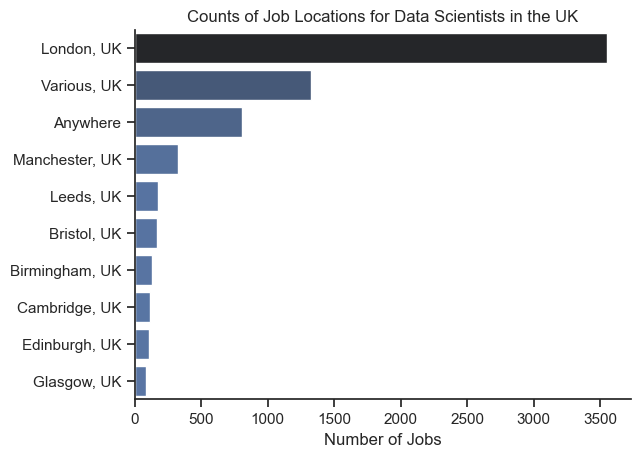

,count
job_location,
"London, UK",3550
"Various, UK",1326
Anywhere,808
"Manchester, UK",329
"Leeds, UK",177
"Bristol, UK",172
"Birmingham, UK",134
"Cambridge, UK",113
"Edinburgh, UK",109


In [34]:
df_plot =df_DA_UK['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Scientists in the UK')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


df_plot 

### Job Opportunities 


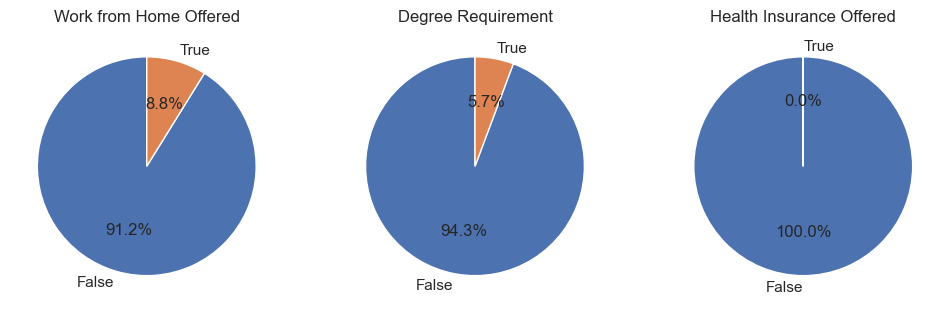

In [19]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_UK[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


plt.show()